In [205]:
B = np.identity(6).astype(int)
B[0,1] = 1
B[1,0] = 1
# B[2,0] = 1
# B[2,1] = 1
# B[0,2] = 1
# B[1,2] = 1

# B[0,4] = 1
# B[4,0] = 1

B[3,4] = 1
B[4,3] = 1


In [218]:
A = np.identity(6).astype(int)
A[0,1] = 1
A[1,0] = 1
# A[2,0] = 1
A[2,1] = 1
# A[0,2] = 1
A[1,2] = 1

# A[0,4] = 1
# A[4,0] = 1

A[3,4] = 1
A[4,3] = 1


In [219]:
A

array([[1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [227]:
ZA = A @ A
ZA

array([[2, 2, 1, 0, 0, 0],
       [2, 3, 2, 0, 0, 0],
       [1, 2, 2, 0, 0, 0],
       [0, 0, 0, 2, 2, 0],
       [0, 0, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 1]])

In [228]:
# ZB = B @ B
# ZB

In [236]:
((ZA.sum(axis=1) / ZA[np.diag_indices(ZA.shape[0],)] - ZA[np.diag_indices(ZA.shape[0],)]) == 0) * 1

array([0, 0, 0, 1, 1, 1])

In [224]:
ZA[np.diag_indices(ZA.shape[0],)]

array([2, 3, 2, 2, 2, 1])

In [202]:
ZB.sum(axis=1) / ZB[np.diag_indices(ZB.shape[0],)] - ZB[np.diag_indices(ZB.shape[0],)]

array([0., 0., 0., 0., 0., 0.])

In [180]:
Z.sum(axis=1)

array([8, 5, 1, 5, 8, 1])

In [181]:
Z.sum(axis=0)

array([8, 5, 1, 5, 8, 1])

In [34]:
A = np.zeros((3,3))
A[:,1] = np.ones(3)

In [35]:
pd.DataFrame(A).astype(int)

,0,1,2
0,0,1,0
1,0,1,0
2,0,1,0


In [36]:
A @ A

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [1]:
%run init_notebook.py

In [2]:
import scipy

In [3]:
def mul_gaussians(g1, g2):
    mu = (g1.std() * g2.mean() + g2.std() * g1.mean()) / (g1.std() + g2.std())
    sig = g1.std() * g2.std() / (g1.std() + g2.std())
    return scipy.stats.norm(mu, sig)

def sum_gaussians(g1, g2):
    mu = g1.mean() + g2.mean()
    sig = g1.std() + g2.std()
    return scipy.stats.norm(mu, sig)

In [163]:
T = 100
A = np.array([[.5]])
true_noise = .8
arr = np.ones((T,A.shape[0])) / 3
for i in range(A.shape[0], len(arr)):
    
    if i == 20:
        eps = .1
    else:
        eps = scipy.stats.norm(0, true_noise).rvs()
    arr[i] = A @ arr[i-1] + eps

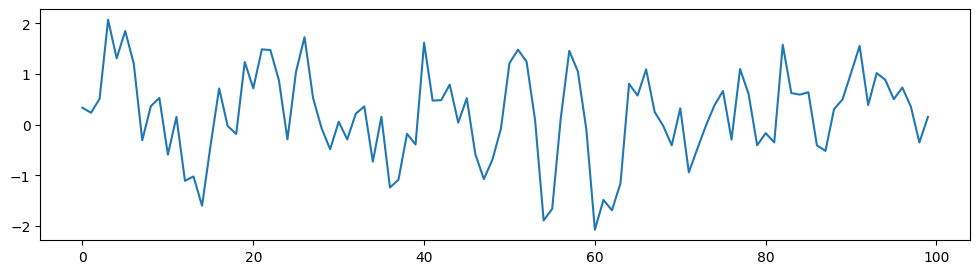

In [164]:
plt.plot(arr[:,0])

In [165]:
g0 = scipy.stats.norm(0, 1)
obs_sig = [(i, true_noise)  for i in arr[:,0]]

g = g0
lst_z, lst_g1, lst_g = [], [], []
for t in range(T):
    # predict position
    f = scipy.stats.norm(0, .5)
    g = sum_gaussians(g, f) # fixed increments
    g1 = sum_gaussians(g, f)
    
    f =  scipy.stats.norm((g.mean() - g.mean() * (1 - .5)), .5)
    g = sum_gaussians(g, f) # AR believe 
    g1 = sum_gaussians(g, f)
    
    # update with measurement
    g = mul_gaussians(g,scipy.stats.norm(obs_sig[t][0], obs_sig[t][1]))

    lst_g.append([g.mean(), g.std()])
    lst_g1.append([g1.mean(), g.std()])
g_true = scipy.stats.norm(*obs_sig[-1])

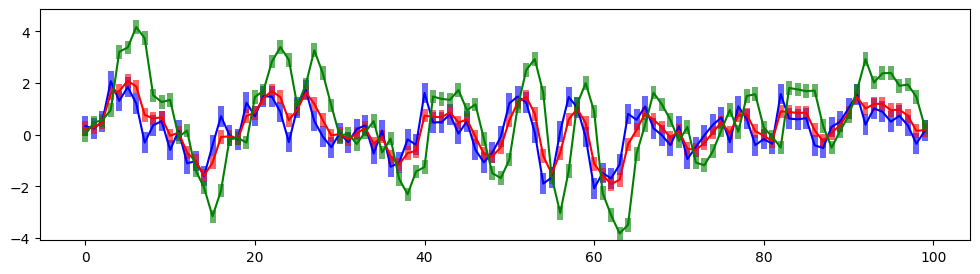

In [166]:
for i, obs in enumerate(obs_sig):
    plt.bar(i, height=obs[1], bottom=obs[0] - 1/2 * obs[1], width=.7, color='blue', alpha=.6)
plt.plot([i[0] for i in obs_sig], color='blue')

for i, obs in enumerate(lst_g):
    plt.bar(i, height=obs[1], bottom=obs[0] - 1/2 * obs[1], width=.7, color='red', alpha=.6)
plt.plot([i[0] for i in lst_g], color='red')

for i, obs in enumerate(lst_g1):
    plt.bar(i, height=obs[1], bottom=obs[0] - 1/2 * obs[1], width=.7, color='green', alpha=.6)
plt.plot([i[0] for i in lst_g1], color='green')

# plt.plot(arr[:,0])


''

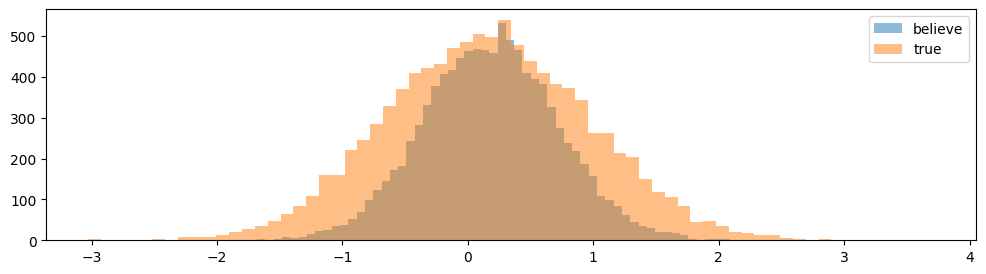

In [167]:
# plt.hist(g0.rvs(10000), bins='fd', alpha=.5)
plt.hist(g.rvs(10000), bins='fd', alpha=.5)
plt.hist(g_true.rvs(10000), bins='fd', alpha=.5)
plt.legend(['believe', 'true'])
;